In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.distributions import chi2

import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [2]:
df = pd.read_csv('medical_no_show.csv', parse_dates=[3,4])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',
                        'ScheduledDay': 'AppointMade',
                        'AppointmentDay': 'AppointFor'}, inplace = True)

df.set_index('AppointmentID', inplace=True)
#df['AppointMade'] = df['AppointMade'].values.astype('datetime64[D]')
#df['AppointFor'] = df['AppointFor'].values.astype('datetime64[D]')
df['Gender'].replace(('M', 'F'), (1, 0), inplace=True)

print(df.info())

dummies = pd.get_dummies(df['No-show'])
df = pd.concat((df, dummies), axis = 1)

noshow_prob = df.Yes.sum() / (df.Yes.sum() + df.No.sum())
print(noshow_prob)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   PatientId      110527 non-null  float64            
 1   Gender         110527 non-null  int64              
 2   AppointMade    110527 non-null  datetime64[ns, UTC]
 3   AppointFor     110527 non-null  datetime64[ns, UTC]
 4   Age            110527 non-null  int64              
 5   Neighbourhood  110527 non-null  object             
 6   Scholarship    110527 non-null  int64              
 7   Hypertension   110527 non-null  int64              
 8   Diabetes       110527 non-null  int64              
 9   Alcoholism     110527 non-null  int64              
 10  Handicap       110527 non-null  int64              
 11  SMS_received   110527 non-null  int64              
 12  No-show        110527 non-null  object             
dtypes: datetime64[ns, UTC]

In [4]:
df.describe()

,PatientId,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No,Yes
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,0.201933
std,2.560949e+14,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.401444
min,3.921784e+04,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.173184e+13,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.439172e+13,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.999816e+14,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


The minimum age is -1 and the maximum is 115. The maximum being that high probably means there are a number of ages with very little sample size so we will likely put the age feature into bins at a later point. But for now lets remove and ages below 0

### Age

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: PatientId, Length: 103, dtype: int64


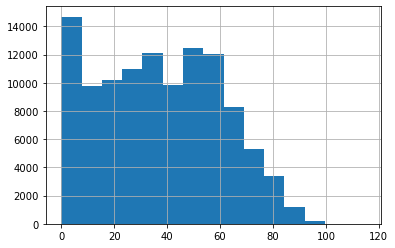

In [5]:
df = df.loc[df['Age'] >= 0]
print(df.groupby('Age')['PatientId'].count())

df['Age'].hist(bins = 15)
plt.show()

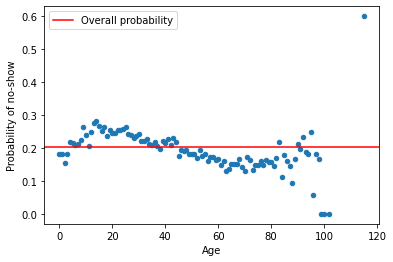

In [6]:
df_age = pd.concat([df.groupby('Age')['No'].sum(), df.groupby('Age')['Yes'].sum()], axis=1)
df_age['Probability of no-show'] = df_age['Yes'] / (df_age['No'] + df_age['Yes'])
df_age.reset_index(inplace=True)
df_age.head()
df_age.plot(kind='scatter', x='Age', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

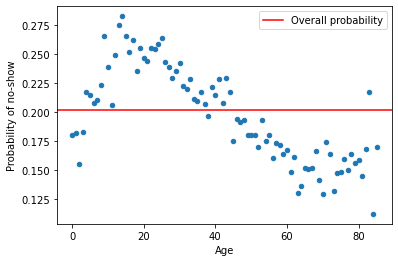

In [7]:
max_age = 85
df['Age'][df['Age'] >= max_age] = max_age

df_age = pd.concat([df.groupby('Age')['No'].sum(), df.groupby('Age')['Yes'].sum()], axis=1)
df_age['Probability of no-show'] = df_age['Yes'] / (df_age['No'] + df_age['Yes'])
df_age.reset_index(inplace=True)
df_age.head()
df_age.plot(kind='scatter', x='Age', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

#from scipy.stats import gaussian_kde

#df_y = df[df['Yes'] == 1]
#df_n = df[df['No'] == 1]

#x_yes = df_n.Age.values
#y_yes = df_n.Yes.values

#y_yes = y_yes+0.00001*np.random.rand(len(y_yes))

#Calculate the point density
#xy = np.vstack([x_yes,y_yes])
#z = gaussian_kde(xy)(xy)

#fig, ax = plt.subplots()
#ax.scatter(x_yes, y_yes, c=z, s=100, edgecolor='')
#plt.ylim(-0.1, 1.1)
#plt.show()

It looks like there is a polynomial relationship with age and probability of showing up for a medical appointment. To me it looks like we would be better using polynomial terms rather than bins for the 'Age' feature and we just reduce all values above 85 down to 85. It is around 85 that there are too few data points per year to give accurate probabilities.

### Categorical features

Correlation for Handicap is -0.006076846582439237
Correlation for handicap - 0 is 0.007281409275944209
Correlation for handicap - 1 is -0.007757374294273439
Correlation for handicap - 2 is 2.550375494778824e-05
Correlation for handicap - 3 is 0.0007790371412119528
Correlation for handicap - 4 is 0.0017053037239939887


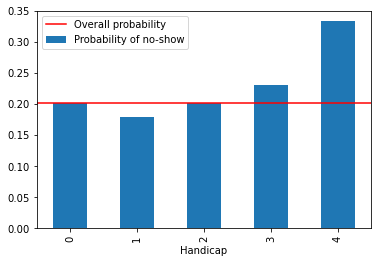

In [8]:
print('Correlation for Handicap is', df['Handicap'].corr(df['Yes']))

dummies_hand = pd.get_dummies(df['Handicap'])
for dum in dummies_hand.columns:
    cor = dummies_hand[dum].corr(df['Yes'])
    print(f'Correlation for handicap - {dum} is {cor}')
    
df_hand = pd.concat([df.groupby('Handicap')['No'].sum(), df.groupby('Handicap')['Yes'].sum()], axis=1)
df_hand['Probability of no-show'] = df_hand['Yes'] / (df_hand['No'] + df_hand['Yes'])
df_hand.reset_index(inplace=True)
df_hand.head()
df_hand.plot(kind='bar', x='Handicap', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

There isn't an overall trend, so to keep this feature intact would not work for a linear relationship. Maybe the best way to look at the effect of handicap on no-show probability would be to only include dummy columns for handicap 1, 3 and 4.

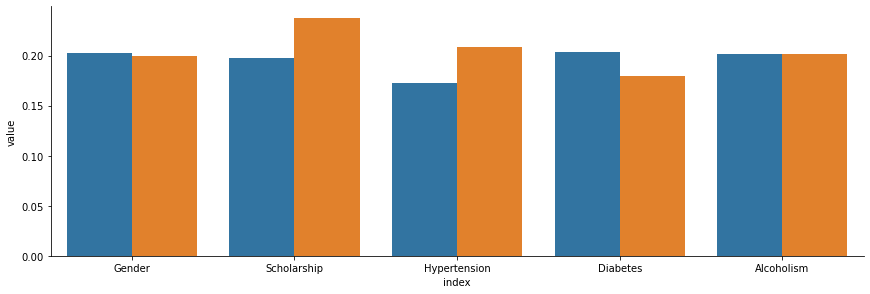

In [9]:
binary_cats = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism']

df_probs = pd.DataFrame()
for cat in binary_cats:
    probs = []
    for unique in df[cat].unique():
        probs.append(df[(df[cat] == unique) & (df['Yes'] == 1)].shape[0] / df[df[cat] == unique].shape[0])
    df_probs[cat] = probs

df_probs = df_probs.T
df_probs2 = pd.melt(df_probs.reset_index(), id_vars='index')

g = sns.factorplot(x='index', y="value", hue="variable", data=df_probs2, size=4,
                     aspect=3, kind="bar", legend=False)
plt.show()

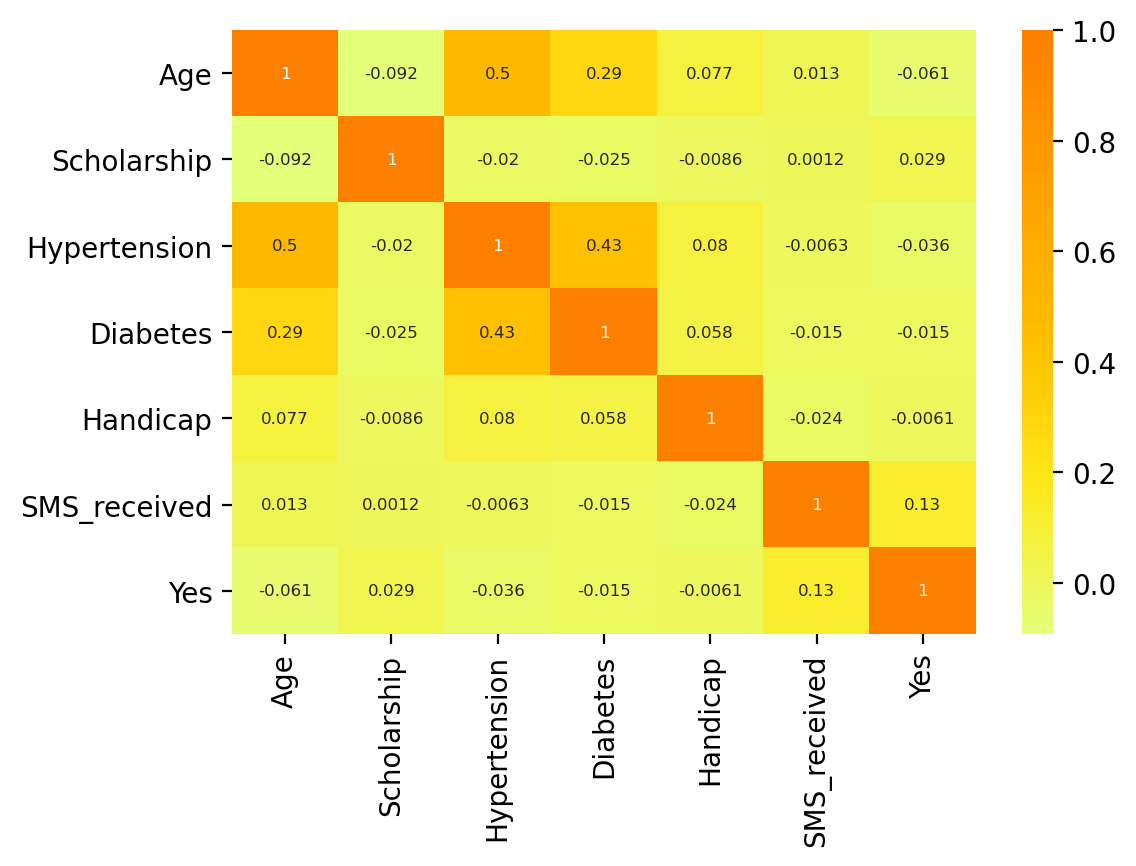

In [10]:
df.drop(['Gender', 'Alcoholism'], inplace=True, axis=1)

# Creating a Pearson correlation matrix to visualise correlations between features
corr_cats = ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Handicap', 'SMS_received', 'Yes']
df_corr = df.loc[:, corr_cats]
corr = df_corr.corr()
fig, ax = plt.subplots(dpi=200)
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax=ax, annot_kws={"size": 6})
plt.show()

There doesn't seem to be any parameters which have a strong correlation with showing up for an appointment. For many of these features, the correlation is stronger with age than with no-show. I would be wary of using these as parameters for the logistic regression. However, there is a clear correlation with receiving an SMS.

In [11]:
df.drop(['Scholarship', 'Hypertension', 'Diabetes'], inplace=True, axis = 1)

### Neghbourhood

In [12]:
neigh_size = df['Neighbourhood'].unique().size
neighbourhoods = df['Neighbourhood'].unique()
print(df['Neighbourhood'].unique())
print(f'\nNumber of neighbourhoods - {neigh_size} \n')
print(f'The overall probability of a no show is {noshow_prob}')

df_neigh = pd.concat([df.groupby('Neighbourhood')['No'].sum(), df.groupby('Neighbourhood')['Yes'].sum()], axis=1)
df_neigh['Total'] = df_neigh.sum(axis=1)
df_neigh['Probability of no-show'] = df_neigh['Yes'] / df_neigh['Total']
df_neigh.sort_values('Total', ascending=False, inplace=True)
print(df_neigh)

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'


In [13]:
small_samp_size = 50

print(f'The number of districts with sample size above our threshold of {small_samp_size} is -')
print(df_neigh[df_neigh['Total'] >= small_samp_size].shape[0])
print(f'The number of districts with sample size below our threshold of {small_samp_size} is -')
print(df_neigh[df_neigh['Total'] < small_samp_size].shape[0])
print('The number of rejected samples is then')
print(df_neigh[df_neigh['Total'] < small_samp_size]['Total'].sum())

df_neigh = df_neigh[df_neigh['Total'] >= small_samp_size]

The number of districts with sample size above our threshold of 50 is -
76
The number of districts with sample size below our threshold of 50 is -
5
The number of rejected samples is then
56.0


The smallest expected frequency should be above 5. At 20% chance of no-show there should be at least 25 from each district to expect 5 no-shows. We will double this just to be safe. The number of districts cut is not large at onle 5 and the number of samples wihtout neighbourhood information is only 56

In [14]:
neigh_vals = df_neigh.loc[:, ['Yes', 'No']].values
chi2_stat, p_val, dof, ex = stats.chi2_contingency(neigh_vals)
print(f'Chi squared value is {chi2_stat} and the p-value is {p_val}')

Chi squared value is 480.5172010361685 and the p-value is 1.8612890706511266e-60


In [15]:
df_neigh['Exp_yes'] = df_neigh['Total'] * noshow_prob
df_neigh['Exp_no'] = df_neigh['Total'] - df_neigh['Exp_yes']
columns_titles = ['No', 'Yes', 'Probability of no-show', 'Exp_no','Exp_yes']
df_neigh=df_neigh.reindex(columns=columns_titles)

print(df_neigh)

                       No     Yes  Probability of no-show       Exp_no  \
Neighbourhood                                                            
JARDIM CAMBURI     6252.0  1465.0                0.189841  6158.686439   
MARIA ORTIZ        4586.0  1219.0                0.209991  4632.781492   
RESISTÊNCIA        3525.0   906.0                0.204469  3536.236829   
JARDIM DA PENHA    3246.0   631.0                0.162755  3094.107467   
ITARARÉ            2591.0   923.0                0.262664  2804.408986   
...                   ...     ...                     ...          ...   
UNIVERSITÁRIO       120.0    32.0                0.210526   121.306251   
SEGURANÇA DO LAR    117.0    28.0                0.193103   115.719779   
NAZARETH            106.0    29.0                0.214815   107.739104   
MORADA DE CAMBURI    80.0    16.0                0.166667    76.614474   
PONTAL DE CAMBURI    57.0    12.0                0.173913    55.066653   

                       Exp_yes  
Neig

In [16]:
def chi_squared(row):
    observed = row[['No', 'Yes']].values
    expected = row[['Exp_no', 'Exp_yes']].values
    
    chi = expected - observed
    chi = chi * chi
    chi = chi / expected
    chi = np.sum(chi)
    
    pval = chi2.sf(chi,1)
    
    return pd.Series({'chi': chi, 'pvalue': pval})

chi_results = df_neigh.apply(chi_squared, axis = 1)

In [17]:
print(chi_results)

neigh_keep = chi_results[chi_results['pvalue'] <= 0.05].index.tolist()
print(neigh_keep)
print('Number of kept neighbourhoods with p-val under 0.05 is -', len(neigh_keep))

neigh_keep2 = chi_results[chi_results['pvalue'] <= 0.01].index.tolist()
print('Number of kept neighbourhoods with p-val under 0.01 is -', len(neigh_keep2))

                         chi        pvalue
Neighbourhood                             
JARDIM CAMBURI      7.001564  8.143852e-03
MARIA ORTIZ         2.339376  1.261401e-01
RESISTÊNCIA         0.176823  6.741175e-01
JARDIM DA PENHA    36.925901  1.227050e-09
ITARARÉ            80.422525  3.023291e-19
...                      ...           ...
UNIVERSITÁRIO       0.069657  7.918371e-01
SEGURANÇA DO LAR    0.070138  7.911353e-01
NAZARETH            0.139018  7.092590e-01
MORADA DE CAMBURI   0.740858  3.893861e-01
PONTAL DE CAMBURI   0.336143  5.620639e-01

[76 rows x 2 columns]
['JARDIM CAMBURI', 'JARDIM DA PENHA', 'ITARARÉ', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'SANTO ANTÔNIO', 'CARATOÍRA', 'JABOUR', 'ILHA DO PRÍNCIPE', 'NOVA PALESTINA', 'ANDORINHAS', 'GURIGICA', 'MARUÍPE', 'FORTE SÃO JOÃO', 'REDENÇÃO', 'JOANA D´ARC', 'CONSOLAÇÃO', 'PRAIA DO SUÁ', 'SANTOS DUMONT', 'VILA RUBIM', 'DO QUADRO', 'REPÚBLICA', 'MATA DA PRAIA', 'DO CABRAL', 'SANTA CLARA', 'SOLON BORGES', 'SANTA CEC

We are left with 30 neighbourhoods which have a reasonable sample size and have a statistical significance (p-value under 0.05. There are 22 with the more stringent p-value under 0.01 requiremnet. We may return to this if we find we have too many features.

In [18]:
dum_neigh = pd.get_dummies(df['Neighbourhood'])
dum_neigh = dum_neigh[neigh_keep]
dum_neigh.head()

#df = pd.concat((df, dum_neigh), axis = 1)
#df.drop('Neighbourhood', axis=1, inplace=True)
#print(df.info())

,JARDIM CAMBURI,JARDIM DA PENHA,ITARARÉ,TABUAZEIRO,SANTA MARTHA,JESUS DE NAZARETH,SANTO ANTÔNIO,CARATOÍRA,JABOUR,ILHA DO PRÍNCIPE,...,VILA RUBIM,DO QUADRO,REPÚBLICA,MATA DA PRAIA,DO CABRAL,SANTA CLARA,SOLON BORGES,SANTA CECÍLIA,MÁRIO CYPRESTE,DE LOURDES
AppointmentID,,,,,,,,,,,,,,,,,,,,,
5642903,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5642503,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5642549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5642828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5642494,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Appointment dates and time

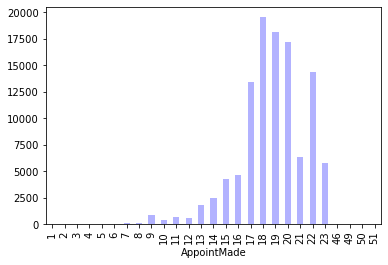

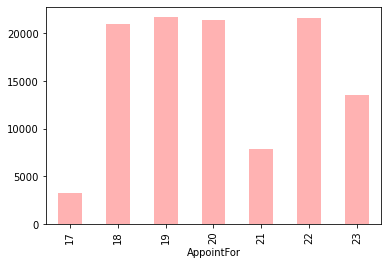

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_wait, dtype: float64


In [19]:
df['AppointMade'] = df['AppointMade'].values.astype('datetime64[s]')
df['AppointMadeD'] = df['AppointMade'].values.astype('datetime64[D]')
df['AppointFor'] = df['AppointFor'].values.astype('datetime64[D]')

df.groupby(df["AppointMade"].dt.week)["AppointMade"].count().plot(kind="bar", color='b', alpha=0.3)
plt.show()
df.groupby(df["AppointFor"].dt.week)["AppointFor"].count().plot(kind="bar", color='r', alpha=0.3)
plt.show()

df['days_wait'] = (df['AppointFor'] - df['AppointMadeD'])  / np.timedelta64(1, 'D')
df['days_wait'] = df['days_wait'].astype(int)
print(df['days_wait'].describe())

5


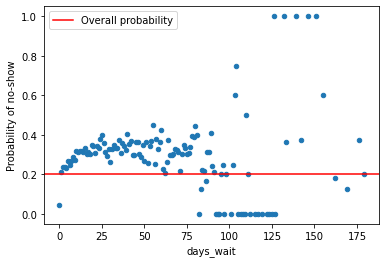

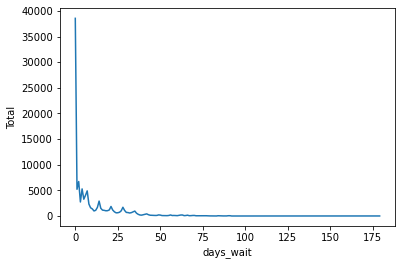

In [20]:
print(df[df['days_wait'].astype(int) < 0].shape[0])
df = df[df['days_wait'] >= 0]

df_days = pd.concat([df.groupby('days_wait')['No'].sum(), df.groupby('days_wait')['Yes'].sum()], axis=1)
df_days['Total'] = df_days['No'] + df_days['Yes']
df_days['Probability of no-show'] = df_days['Yes'] / df_days['Total']
df_days.reset_index(inplace=True)

df_days.plot(kind='scatter', x='days_wait', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

#sns.barplot(data=df_days[df_days['days_wait'] > 75], x='days_wait', y='Total')
#plt.xticks(fontsize=6)
sns.lineplot(data=df_days, x='days_wait', y='Total')
plt.show()

There seems to be a polynomial relationship here but it is made not clear by the high wait time data points as there are not enough samples at these points. We will combine all values above 75 at 75.

We also see that 0 days has a clearly different relationship than the rest and so this deserves its own weighting. Giving instances a 1 for same day appointment and 0 for not same day will introduce a bias for the same day instances.

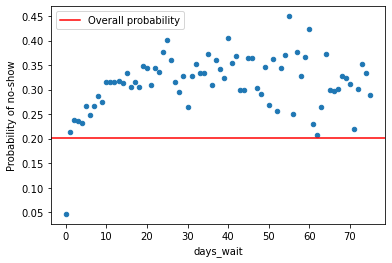

In [21]:
df['same_day'] = np.NaN
df.loc[df['days_wait'] == 0, 'same_day'] = 1
df['same_day'].fillna(0, inplace=True)

max_days = 75
df['days_wait'][df['days_wait'] >= max_days] = max_days

df_days = pd.concat([df.groupby('days_wait')['No'].sum(), df.groupby('days_wait')['Yes'].sum()], axis=1)
df_days['Total'] = df_days['No'] + df_days['Yes']
df_days['Probability of no-show'] = df_days['Yes'] / df_days['Total']
df_days.reset_index(inplace=True)

df_days.plot(kind='scatter', x='days_wait', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

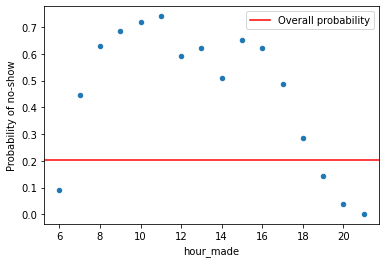

In [22]:
df['hour_made'] = df['AppointMade'].dt.hour

df_hour = pd.concat([df.groupby('hour_made')['No'].sum(), df.groupby('hour_made')['Yes'].sum()], axis=1)
df_hour['Total'] = df_days['No'] + df_hour['Yes']
df_hour['Probability of no-show'] = df_hour['Yes'] / df_hour['Total']
df_hour.reset_index(inplace=True)

df_hour.plot(kind='scatter', x='hour_made', y='Probability of no-show')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.legend()
plt.show()

So there is a relationship here and it will certainly need polynomial terms to capture it. There is a clear correlation with the work day here, with even a dip during lunch time. This suggests to me that people who make appointments during work hours are probably less likely to be working and could therefore be a little more unreliable. This might mean we need to treat weekdays and weekends separately.

         Yes       No  Probability of no-show
Mon   4561.0  18523.0                0.197583
Tue   5290.0  20877.0                0.202163
Wed   4876.0  19383.0                0.200998
Thur  3699.0  14373.0                0.204681
Fri   3887.0  15028.0                0.205498
Sat      1.0     23.0                0.041667


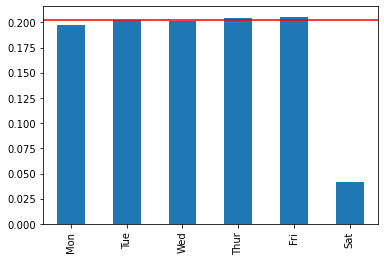

         Yes       No  Probability of no-show
Mon   4689.0  18024.0                0.206446
Tue   5150.0  20488.0                0.200874
Wed   5092.0  20774.0                0.196861
Thur  3337.0  13909.0                0.193494
Fri   4037.0  14982.0                0.212261
Sat      9.0     30.0                0.230769


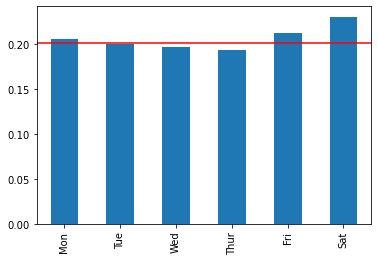

In [23]:
week_days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']

df['dow_made'] = df['AppointMade'].dt.dayofweek
df_dow = pd.concat((df.groupby('dow_made')['Yes'].sum(), df.groupby('dow_made')['No'].sum()), axis=1)
df_dow['Probability of no-show'] = df_dow['Yes'] / (df_dow['Yes'] + df_dow['No'])
df_dow.index = week_days

print(df_dow.head(7))
df_dow['Probability of no-show'].plot(kind='bar')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.show()

df['dow_for'] = df['AppointFor'].dt.dayofweek
df_dowf = pd.concat((df.groupby('dow_for')['Yes'].sum(), df.groupby('dow_for')['No'].sum()), axis=1)
df_dowf['Probability of no-show'] = df_dowf['Yes'] / (df_dowf['Yes'] + df_dowf['No'])
df_dowf.index = week_days

print(df_dowf.head(7))
df_dowf['Probability of no-show'].plot(kind='bar')
plt.axhline(noshow_prob, c='r', label='Overall probability')
plt.show()

We have so few weekend bookings and appointments that we don't need to worry about it. This means time of day will entirely capture whether it is during work time or not and we don't need to separate the time for weekend and weekday.

### Individual patient records

In [24]:
'''
def count_missed_apts_before_now(row, df):
    subdf = df.query("AppointFor<@row.AppointMade and\
                     `No-show`=='Yes' and PatientId==@row.PatientId")
    return len(subdf)

df.sort_values(by='AppointMade', inplace=True)
# Calculating how many time the patient has made an appointment before
df['book_count'] = df.groupby('PatientId').cumcount()
# Calculating the number of times a patient has missed an appointment before making the current one
t3 = time.time()
df['miss_count'] = df.apply(count_missed_apts_before_now, axis=1, args = (df,))
t4 = time.time()
miss_count_t = t4-t3
print(f'miss count column calculated in {miss_count_t}')

df.drop(['PatientID', 'AppointMade'], inplace=True, axis=1)
df.tail()
'''

df['book_count'] = 56
df['miss_count'] = 33

# Feature engineering

Lets start by clearing out some columns that wont be used.

In [25]:
df.drop(['dow_made', 'dow_for', 'No', 'No-show', 
         'Neighbourhood', 'AppointFor', 'AppointMade', 
         'PatientId', 'AppointMadeD', 'Handicap'], axis=1, inplace=True)



                  PatientId         AppointMade AppointFor  Age  \
AppointmentID                                                     
5642903        2.987250e+13 2016-04-29 18:38:08 2016-04-29   62   
5642503        5.589978e+14 2016-04-29 16:08:27 2016-04-29   56   
5642549        4.262962e+12 2016-04-29 16:19:04 2016-04-29   62   
5642828        8.679512e+11 2016-04-29 17:29:31 2016-04-29    8   
5642494        8.841186e+12 2016-04-29 16:07:23 2016-04-29   56   

                   Neighbourhood  Handicap  SMS_received No-show  No  Yes  \
AppointmentID                                                               
5642903          JARDIM DA PENHA         0             0      No   1    0   
5642503          JARDIM DA PENHA         0             0      No   1    0   
5642549            MATA DA PRAIA         0             0      No   1    0   
5642828        PONTAL DE CAMBURI         0             0      No   1    0   
5642494          JARDIM DA PENHA         0             0      No   1

In [30]:
df = pd.concat((df, dum_neigh), axis = 1)
#df.drop('Neighbourhood', axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 5030230 to 5790484
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                110521 non-null  float64
 1   Handicap           110521 non-null  float64
 2   SMS_received       110521 non-null  float64
 3   Yes                110521 non-null  float64
 4   days_wait          110521 non-null  float64
 5   same_day           110521 non-null  float64
 6   hour_made          110521 non-null  float64
 7   book_count         110521 non-null  float64
 8   miss_count         110521 non-null  float64
 9   JARDIM CAMBURI     110526 non-null  uint8  
 10  JARDIM DA PENHA    110526 non-null  uint8  
 11  ITARARÉ            110526 non-null  uint8  
 12  TABUAZEIRO         110526 non-null  uint8  
 13  SANTA MARTHA       110526 non-null  uint8  
 14  JESUS DE NAZARETH  110526 non-null  uint8  
 15  SANTO ANTÔNIO      110526 non-null  uint8  
